# Project Milestone 1

# Overview:

Finding a dataset is always the toughest part of these term projects. There is literally data all over the place. The abundance of data and unresearched questions is why most of us choose this field of study but narrowing down just 1 topic to dig into is brain racking. To avoid this pain stacking task, I most of the time narrow my scope to focus only on sports related topics. However, this time I wanted to change it up a bit. I logged on to Kaggle and just start looking through the most popular utilized datasets. While scrolling through the list I found a dataset of tweets by US senators. This dataset included the senator’s twitter usernames, the context of the tweet, how many times it was retweeted, favorited, and replied to. With this data set I could practice implementing all the data mining and text analysis processes we have work through so far. I can perform semantic analysis on the text body of the tweets, I can try to predict the party based on the context of the tweet, and analyze which parties has the most impact via Twitter. I thought this was too good of a data set to pass up. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load the data file into a DataFrame.
df= pd.read_csv(r'C:\Users\nickm\Documents\senators.csv')

In [5]:
df.head(10)

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/2017 21:47,We released bipartisan healthcare bill today a...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/2017 18:48,I spoke with MorningJoe team abt HonestAds bil...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/2017 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/2017 18:04,Todays the day MarkWarner SenJohnMcCain amp I ...,https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/2017 16:33,MarkWarner SenJohnMcCain amp I put together Ho...,https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN
5,10/19/2017 15:14,Great chat w chrislhayes about Sessions hearin...,https://twitter.com/amyklobuchar/status/921031...,9,37,221,amyklobuchar,K000367,D,MN
6,10/18/2017 23:23,Happy to announce SenJohnMcCain has joined our...,https://twitter.com/amyklobuchar/status/920792...,72,834,3800,amyklobuchar,K000367,D,MN
7,10/18/2017 21:44,Fed judges in MD amp HI halted the Admins late...,https://twitter.com/amyklobuchar/status/920767...,15,88,361,amyklobuchar,K000367,D,MN
8,10/18/2017 17:38,It was good to hear that AG Sessions is willin...,https://twitter.com/amyklobuchar/status/920705...,31,46,224,amyklobuchar,K000367,D,MN
9,10/18/2017 17:08,President called investigation into Russias me...,https://twitter.com/amyklobuchar/status/920698...,77,160,864,amyklobuchar,K000367,D,MN


The describe function enables me to grab quick stats about the nominal values within my data.
Here I have captured to mean, std, min, count, and max values from the replies, retweets, and favorites variables.

In [6]:
df.describe()

,replies,retweets,favorites
count,288615.000000,2.886150e+05,2.886150e+05
mean,41.901758,2.489682e+02,5.864404e+02
std,470.367102,7.793342e+03,1.115510e+04
min,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,3.000000e+00,3.000000e+00
50%,3.000000,8.000000e+00,1.300000e+01
75%,13.000000,3.200000e+01,7.200000e+01
max,66872.000000,3.644423e+06,2.108865e+06


Similar to the chart of stats provided for the nominal columns, I have provided one for the non- nominal
columns. 

In [7]:
df.describe(include=['O'])

,created_at,text,url,user,bioguide_id,party,state
count,288615,288612,288615,288615,288615,288615,288615
unique,228527,286878,288615,100,100,3,50
top,7/14/2017 16:08,Joining newsradio1029 shortly Tune in,https://twitter.com/SenBobCasey/status/8453743...,SenatorTomUdall,F000463,R,NH
freq,14,18,1,3247,3247,146278,6482


The Party value counts bar chart will show which political party has tweeted the most. 
You will see the Rebulican party has a slight edge over the Democrats.
This will also show how limited the use of Twitter is for the Independant party.

In [28]:
#Creating X and Y variables for Party graph
X_Party = df.groupby('party').size().reset_index(name='Counts')['party']
Y_Party = df.groupby('party').size().reset_index(name='Counts')['Counts']

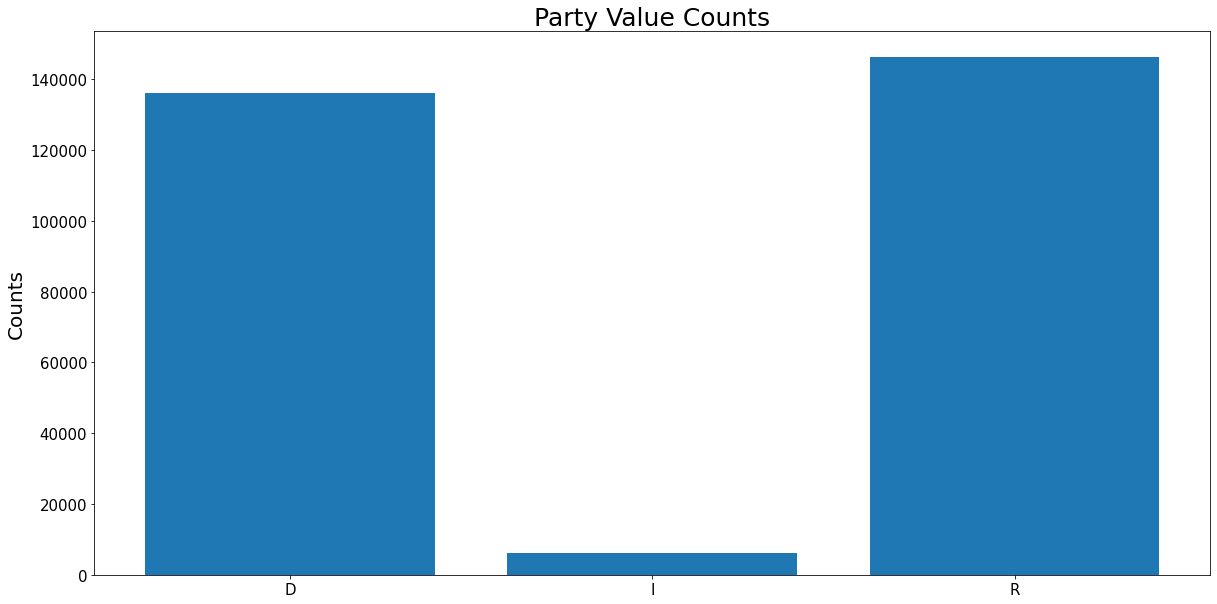

In [39]:
plt.bar(X_Party, Y_Party)
plt.title('Party Value Counts', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

The Tweet count graph shows the amount of time each Senator tweeted during their term. 
Here we can see which senator utlized Twitter the most.

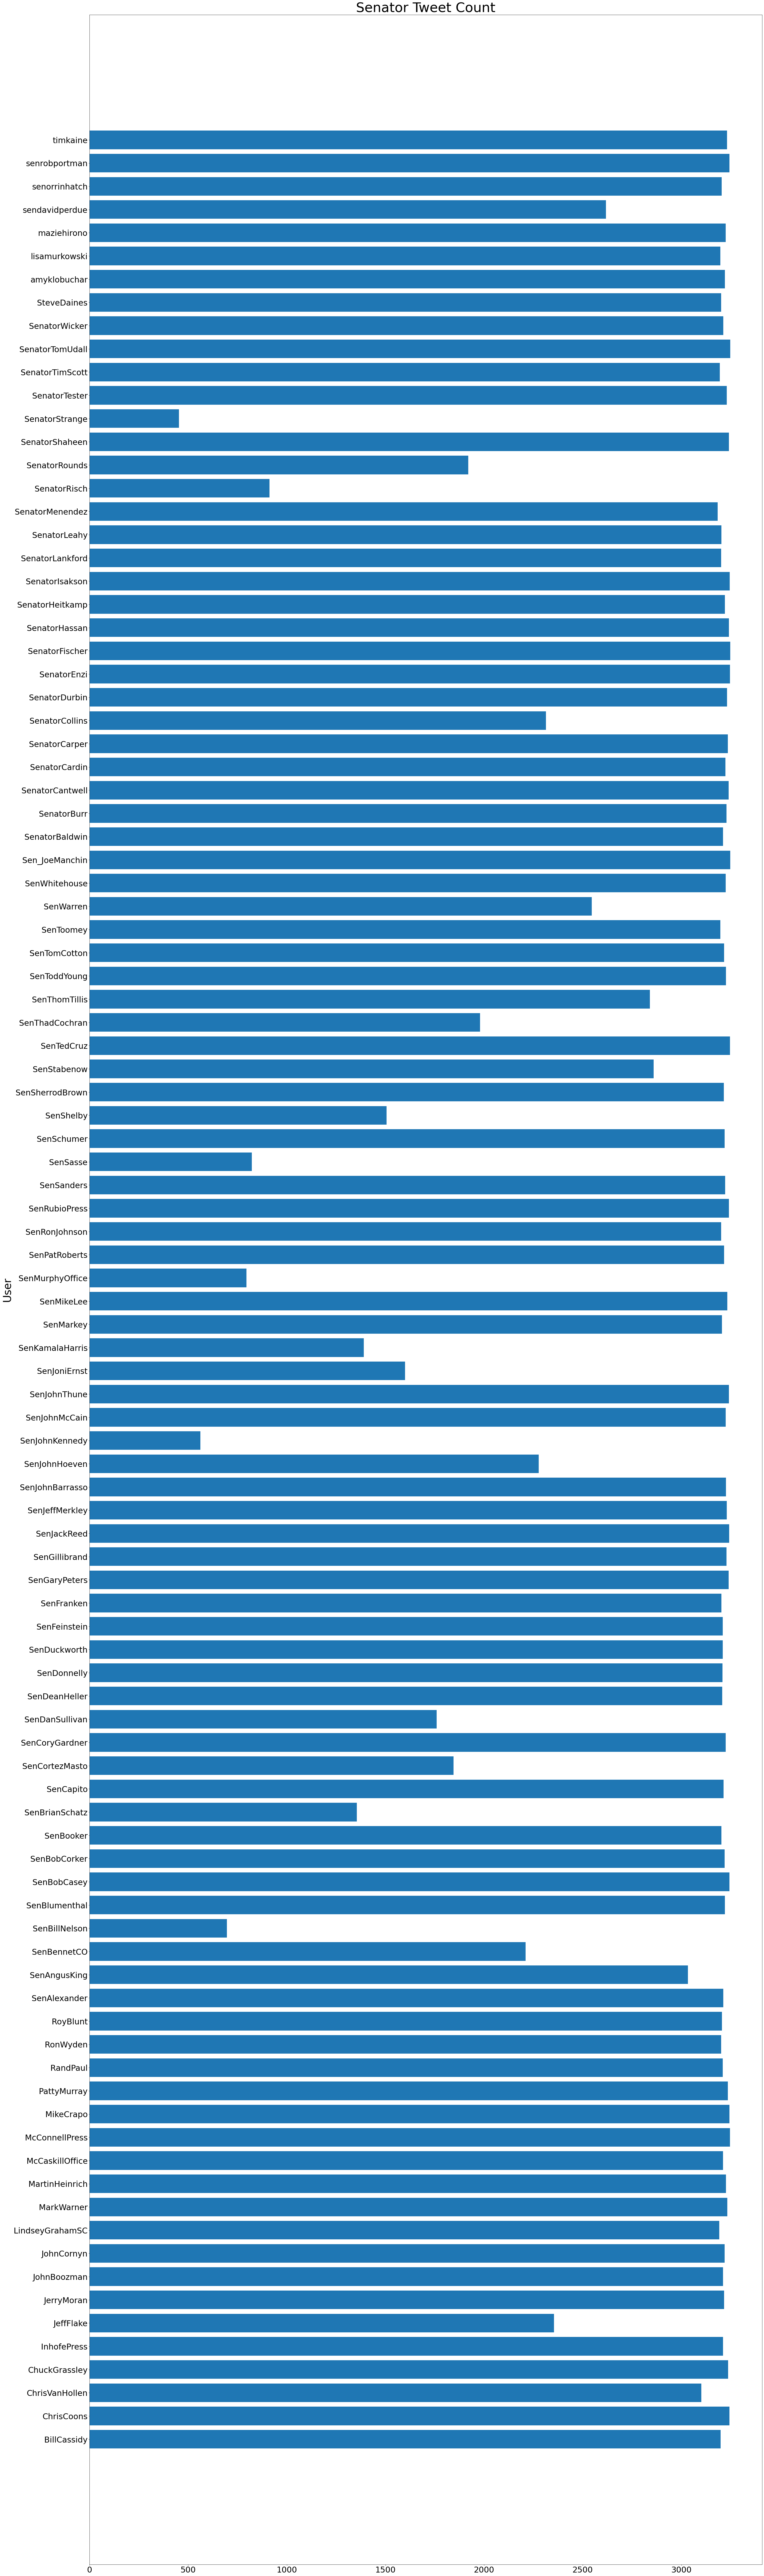

In [101]:
plt.barh(X_User, Y_User)
plt.title('Senator Tweet Count', fontsize=50)
plt.ylabel('User', fontsize=40)
#plt.figure(figsize=(100, 30))
plt.tick_params(axis='both', labelsize=30)
plt.rcParams['figure.figsize'] = (45, 175)
plt.show()